# lecture 01
### Student Number: SE/2019/003
### Date Created: 25/10/2024

## Basic pandas for ML

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### Read Data

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/lecture_1_ML/bigmart_sales.csv'
data = pd.read_csv(file_path)

# Display the first few rows to verify
print(data.head())

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

### Checking the data size and variable type

In [ ]:
# Check dataset size and variable types
dataset_size = data.shape
variable_types = data.dtypes

# Display
print("-------------------------------------------------------------------------")
print(f"Dataset Size:{dataset_size}")
print("-------------------------------------------------------------------------")
print(f"Variable Types:\n{variable_types}")
print("-------------------------------------------------------------------------")

-------------------------------------------------------------------------
Dataset Size:(8523, 12)
-------------------------------------------------------------------------
Variable Types:
Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object
-------------------------------------------------------------------------


### Summary Stats for numerical columns

In [ ]:
print(f"Data summary:\n {data.describe()}")

Data summary:
        Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


### Summary Stats for categorical Columns

In [ ]:
print(f"Categorical Feature Overview:\n{data.describe(include=['O'])}")

Categorical Feature Overview:
       Item_Identifier Item_Fat_Content              Item_Type  \
count             8523             8523                   8523   
unique            1559                5                     16   
top              FDW13          Low Fat  Fruits and Vegetables   
freq                10             5089                   1232   

       Outlet_Identifier Outlet_Size Outlet_Location_Type        Outlet_Type  
count               8523        6113                 8523               8523  
unique                10           3                    3                  4  
top               OUT027      Medium               Tier 3  Supermarket Type1  
freq                 935        2793                 3350               5577  


### Navigating the Dataframe

#### Access specific columns by name (e.g., 'Item_Identifier', 'Item_Weight', 'Item_Outlet_Sales')

In [ ]:

columns_selected = data[['Item_Identifier', 'Item_Weight', 'Item_Outlet_Sales']]

# Display the first few rows of these columns
print(columns_selected.head())

  Item_Identifier  Item_Weight  Item_Outlet_Sales
0           FDA15         9.30          3735.1380
1           DRC01         5.92           443.4228
2           FDN15        17.50          2097.2700
3           FDX07        19.20           732.3800
4           NCD19         8.93           994.7052


#### Access specific rows using the index

In [ ]:
rows_selected = data.iloc[10:20]
print(f"Selected Data:\n{rows_selected}")

Selected Data:
    Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
10           FDY07        11.80          Low Fat         0.000000   
11           FDA03        18.50          Regular         0.045464   
12           FDX32        15.10          Regular         0.100014   
13           FDS46        17.60          Regular         0.047257   
14           FDF32        16.35          Low Fat         0.068024   
15           FDP49         9.00          Regular         0.069089   
16           NCB42        11.80          Low Fat         0.008596   
17           FDP49         9.00          Regular         0.069196   
18           DRI11          NaN          Low Fat         0.034238   
19           FDU02        13.35          Low Fat         0.102492   

                Item_Type  Item_MRP Outlet_Identifier  \
10  Fruits and Vegetables   45.5402            OUT049   
11                  Dairy  144.1102            OUT046   
12  Fruits and Vegetables  145.4786            OUT049

## Select Row Based on condition

#### Select rows where 'Item_Outlet_Sales' is greater than 2000

In [ ]:
high_sales = data[data['Item_Outlet_Sales'] > 2000]

# Display the selected rows
print(high_sales.head())

   Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0            FDA15          9.3          Low Fat         0.016047   
2            FDN15         17.5          Low Fat         0.016760   
7            FDP10          NaN          Low Fat         0.127470   
9            FDU28         19.2          Regular         0.094450   
11           FDA03         18.5          Regular         0.045464   

       Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
0          Dairy  249.8092            OUT049                       1999   
2           Meat  141.6180            OUT049                       1999   
7    Snack Foods  107.7622            OUT027                       1985   
9   Frozen Foods  187.8214            OUT017                       2007   
11         Dairy  144.1102            OUT046                       1997   

   Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0       Medium               Tier 1  Supermarket Type1    

In [ ]:
# Select rows where 'Item_Outlet_Sales' > 2000 and 'Outlet_Establishment_Year' > 2005
filtered_data = data[(data['Item_Outlet_Sales'] > 2000) & (data['Outlet_Establishment_Year'] > 2005)]

# Display the selected rows
print(filtered_data.head())

   Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
9            FDU28       19.200          Regular         0.094450   
31           NCS17       18.600          Low Fat         0.080829   
32           FDP33       18.700          Low Fat         0.000000   
43           FDC02       21.350          Low Fat         0.069103   
53           FDA43       10.895          Low Fat         0.065042   

                Item_Type  Item_MRP Outlet_Identifier  \
9            Frozen Foods  187.8214            OUT017   
31     Health and Hygiene   96.4436            OUT018   
32            Snack Foods  256.6672            OUT018   
43                 Canned  259.9278            OUT018   
53  Fruits and Vegetables  196.3794            OUT017   

    Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
9                        2007         NaN               Tier 2   
31                       2009      Medium               Tier 3   
32                       2009      Medium   

In [ ]:
medium_oulet = data[data['Outlet_Size'] == 'Medium']
print(medium_oulet.head())

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15        9.300          Low Fat         0.016047   
1           DRC01        5.920          Regular         0.019278   
2           FDN15       17.500          Low Fat         0.016760   
5           FDP36       10.395          Regular         0.000000   
7           FDP10          NaN          Low Fat         0.127470   

      Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
0         Dairy  249.8092            OUT049                       1999   
1   Soft Drinks   48.2692            OUT018                       2009   
2          Meat  141.6180            OUT049                       1999   
5  Baking Goods   51.4008            OUT018                       2009   
7   Snack Foods  107.7622            OUT027                       1985   

  Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0      Medium               Tier 1  Supermarket Type1          3735.138

## Missing Value

In [ ]:
missing_value = data.isnull().sum()
print("<------------------------------------------------------------------------->")
print(f"The missing values are: \n{missing_value}")
print("<------------------------------------------------------------------------->")

<------------------------------------------------------------------------->
The missing values are: 
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64
<------------------------------------------------------------------------->


### Filling Null Values

In [ ]:
# Step 1: Fill missing values in 'Item_Weight' with the mean
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)

# Step 2: Fill missing values in 'Outlet_Size' with the mode
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace=True)

# Display the updated dataset to confirm that missing values have been addressed
print(f"Missing values after addressing them:\n{data.isnull().sum()}")


Missing values after addressing them:
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


<ipython-input-43-53e75513a017>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)


### Check Unique values with coulmn

In [ ]:
# Display unique values and their counts for the 'Outlet_Size' column
print(f"Unique values in 'Outlet_Size':\n{data['Outlet_Size'].value_counts()}")

Unique values in 'Outlet_Size':
Outlet_Size
Medium    5203
Small     2388
High       932
Name: count, dtype: int64


### Replace Value

In [45]:
# Display the current unique values in 'Item_Fat_Content'
print(f"Current unique values in 'Item_Fat_Content':\n{data['Item_Fat_Content'].value_counts()}")


Current unique values in 'Item_Fat_Content':
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


In [46]:
# Replace values in the 'Item_Fat_Content' column
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({
    'Low Fat': 'Low_Fat',
    'LF': 'Low_Fat',
    'Regular': 'Regular',
    'reg': 'Regular',
    'low fat': 'Low_Fat'
})

In [47]:
# Display the updated unique values to verify changes
print("\nUpdated unique values in 'Item_Fat_Content':")
print(data['Item_Fat_Content'].value_counts())


Updated unique values in 'Item_Fat_Content':
Item_Fat_Content
Low_Fat    5517
Regular    3006
Name: count, dtype: int64


### Duplicate Values

In [48]:
# Check for duplicates
duplicate_rows = data[data.duplicated()]

# Display the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


In [49]:
# Remove duplicates if present
data_cleaned = data.drop_duplicates()

### Group By

In [50]:
# Group by 'Outlet_Type' and summarize 'Item_Outlet_Sales'
summary = data.groupby('Outlet_Type')['Item_Outlet_Sales'].agg(['mean', 'sum', 'count']).reset_index()

# Rename the columns for better clarity
summary.columns = ['Outlet_Type', 'Average_Sales', 'Total_Sales', 'Count']

# Display the summary
print(summary)

         Outlet_Type  Average_Sales   Total_Sales  Count
0      Grocery Store     339.828500  3.680343e+05   1083
1  Supermarket Type1    2316.181148  1.291734e+07   5577
2  Supermarket Type2    1995.498739  1.851823e+06    928
3  Supermarket Type3    3694.038558  3.453926e+06    935


### Loopeing over a column

In [51]:
# Looping over the Salary column and printing values above 100,000
i=0
for visibility_score in data['Item_Visibility']:
    if visibility_score > 0.05:
        print(visibility_score)
        if i==10:
          print("Have break the loop:- don't want to show lot of data in same page.")
          break
        i+=1

0.127469857
0.09444959
0.1000135
0.0680243
0.069088961
0.069196376
0.10249212
0.138190277
0.057556998
0.099887103
0.066693437
Have break the loop:- don't want to show lot of data in same page.


### Create an empty list to hold the indicate of the rows with high visibility

In [54]:
# Create an empty list to hold the indices of rows with high visibility
high_visibility_indices = []

# Loop over the 'Item_Visibility' column
for index, visibility in enumerate(data['Item_Visibility']):
  # print(index,visibility)
    if visibility > 0.05:
        high_visibility_indices.append(index)


# Filter the DataFrame using the indices of high visibility items
high_visibility_items = data.loc[high_visibility_indices]

# Display the resulting DataFrame
print(high_visibility_items)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
7              FDP10    12.857645          Low_Fat         0.127470   
9              FDU28    19.200000          Regular         0.094450   
12             FDX32    15.100000          Regular         0.100014   
14             FDF32    16.350000          Low_Fat         0.068024   
15             FDP49     9.000000          Regular         0.069089   
...              ...          ...              ...              ...   
8514           FDA01    15.000000          Regular         0.054489   
8516           NCJ19    18.600000          Low_Fat         0.118661   
8517           FDF53    20.750000          Regular         0.083607   
8518           FDF22     6.865000          Low_Fat         0.056783   
8521           FDN46     7.210000          Regular         0.145221   

                  Item_Type  Item_MRP Outlet_Identifier  \
7               Snack Foods  107.7622            OUT027   
9              Frozen Foods  

## Exploratory Data Analysis

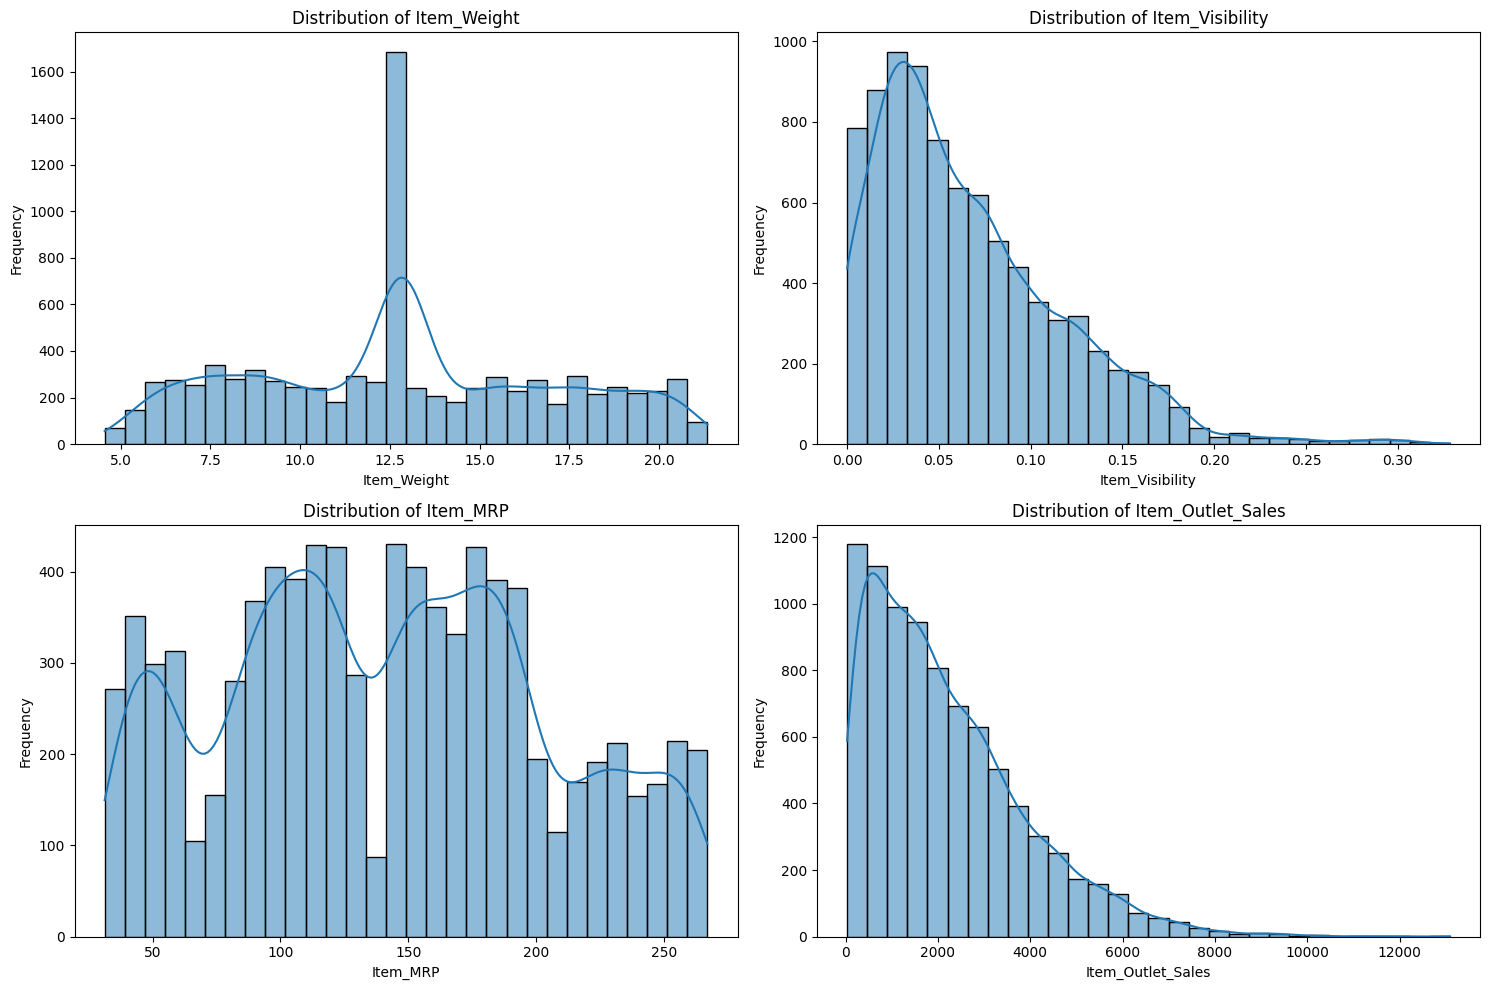

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the numerical columns to select
numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

# Create a figure for the plots with a fixed subplot size
plt.figure(figsize=(15, 10))

# Set the number of rows and columns for subplots
rows = 2
cols = 2

# Loop through each specified numerical column and plot its histogram
for i, column in enumerate(numerical_columns):
    plt.subplot(rows, cols, i + 1)  # Set subplot size
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

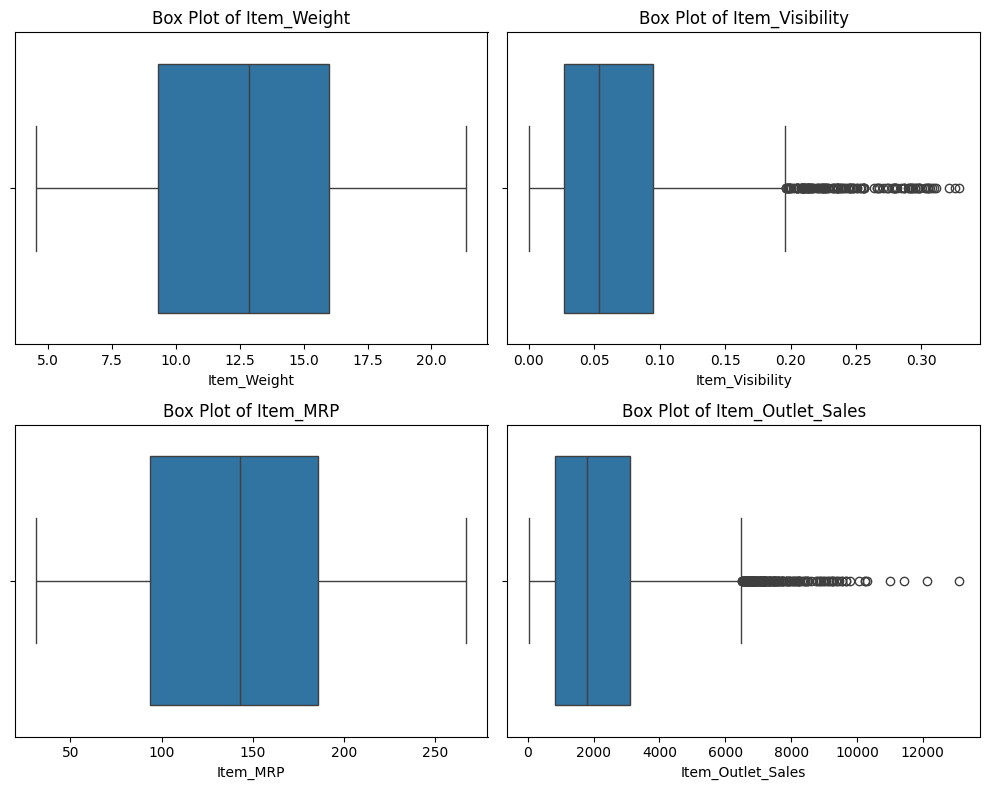

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the numerical columns to select (excluding 'Outlet_Establishment_Year')
numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

# Create a figure for the box plots
plt.figure(figsize=(10, 8))

# Loop through each specified numerical column and plot its box plot
for i, column in enumerate(numerical_columns):
    plt.subplot(2, 2, i + 1)  # 2 rows and 2 columns
    sns.boxplot(data=data, x=column)
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

# Adjust layout
plt.tight_layout()
plt.show()

In [57]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['Item_Outlet_Sales'].quantile(0.25)
Q3 = data['Item_Outlet_Sales'].quantile(0.75)
IQR = Q3 - Q1

# Determine the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['Item_Outlet_Sales'] < lower_bound) | (data['Item_Outlet_Sales'] > upper_bound)]

# Display outliers
print("Outliers in Item_Outlet_Sales:")
print(outliers)

Outliers in Item_Outlet_Sales:
     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
43             FDC02    21.350000          Low_Fat         0.069103   
130            FDY25    12.857645          Low_Fat         0.033810   
132            NCR53    12.857645          Low_Fat         0.144338   
145            FDP16    18.600000          Low_Fat         0.039356   
203            FDI24    12.857645          Low_Fat         0.078362   
...              ...          ...              ...              ...   
8245           FDU55    16.200000          Low_Fat         0.035967   
8329           NCQ06    12.857645          Low_Fat         0.041622   
8350           NCE18    10.000000          Low_Fat         0.021421   
8447           FDS26    20.350000          Low_Fat         0.089975   
8510           FDN58    13.800000          Regular         0.056862   

                  Item_Type  Item_MRP Outlet_Identifier  \
43                   Canned  259.9278            OUT018  

### Rescale Features

In [58]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()

# Rescale the 'Item_Outlet_Sales' column
data['Item_Outlet_Sales_MinMax'] = min_max_scaler.fit_transform(data[['Item_Outlet_Sales']])

# Display the original and rescaled columns
print(data[['Item_Outlet_Sales', 'Item_Outlet_Sales_MinMax']].head())

   Item_Outlet_Sales  Item_Outlet_Sales_MinMax
0          3735.1380                  0.283587
1           443.4228                  0.031419
2          2097.2700                  0.158115
3           732.3800                  0.053555
4           994.7052                  0.073651


### Tranform Features

In [59]:
import numpy as np

# Log transform the 'Item_Outlet_Sales' column
# Use np.log1p to avoid log(0) issues; log1p(x) computes log(1 + x)
data['Item_Outlet_Sales_Log'] = np.log1p(data['Item_Outlet_Sales'])

# Display the original and log-transformed columns
print(data[['Item_Outlet_Sales', 'Item_Outlet_Sales_Log']].head())

   Item_Outlet_Sales  Item_Outlet_Sales_Log
0          3735.1380               8.225808
1           443.4228               6.096776
2          2097.2700               7.648868
3           732.3800               6.597664
4           994.7052               6.903451


### Handling Categorical values

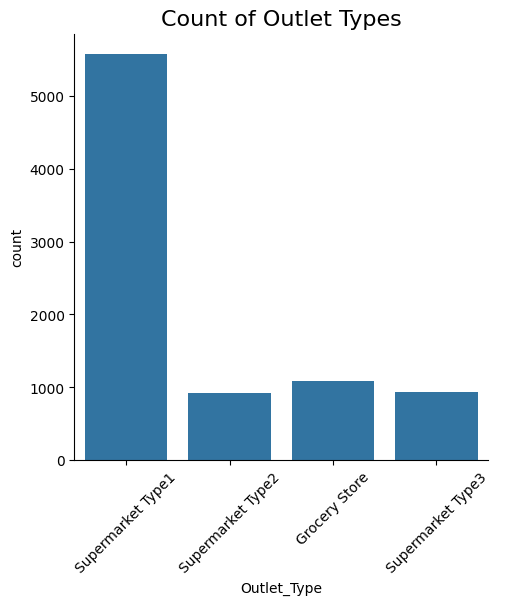

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetics for the plots
#sns.set(style='whitegrid')

# Create a categorical plot (catplot) for 'Outlet_Type'
sns.catplot(x='Outlet_Type', kind='count', data=data)

# Add titles
plt.title('Count of Outlet Types', fontsize=16)

# Show the plot
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.show()

In [61]:
# Show value counts for the 'Outlet_Type' column
outlet_type_counts = data['Outlet_Type'].value_counts()

# Display the value counts
print(outlet_type_counts)

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64


In [62]:
# Perform one-hot encoding on the 'Outlet_Type' column
data_one_hot_encoded = pd.get_dummies(data, columns=['Outlet_Type'], drop_first=True)

# Display the first few rows of the modified DataFrame
print(data_one_hot_encoded.head())

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low_Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low_Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low_Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

### Plot Two Categorical Variables

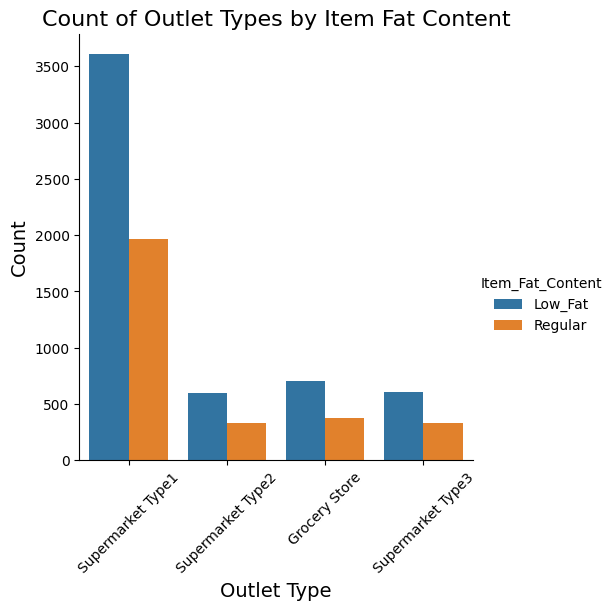

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetics for the plots
#sns.set(style='whitegrid')

# Create a categorical plot (catplot) for 'Outlet_Type' and 'Item_Fat_Content'
sns.catplot(x='Outlet_Type', hue='Item_Fat_Content', kind='count', data=data)

# Add titles and labels
plt.title('Count of Outlet Types by Item Fat Content', fontsize=16)
plt.xlabel('Outlet Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.show()

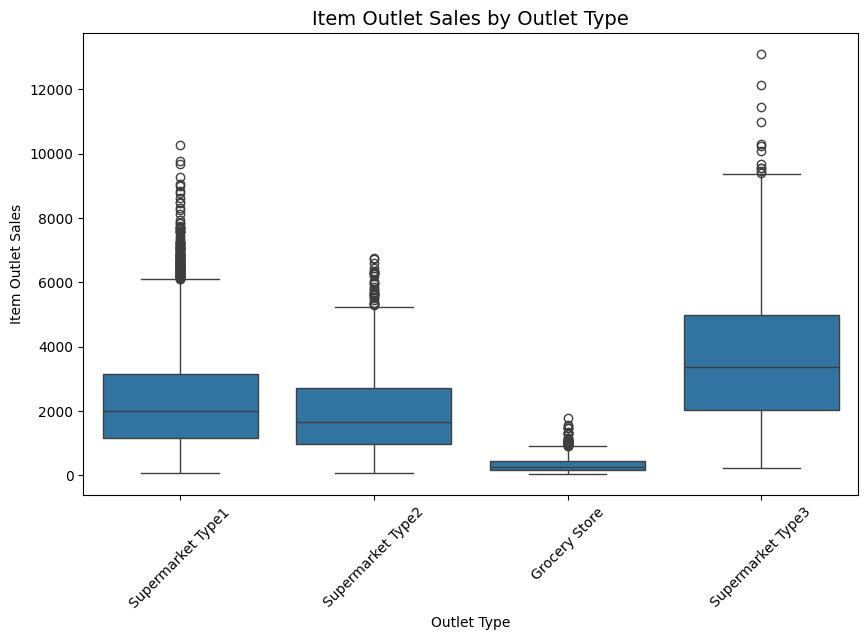

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Side by side boxplot of Item_Outlet_Sales by Outlet_Type (categorical variable)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=data)

# Adding title and labels
plt.title('Item Outlet Sales by Outlet Type', fontsize=14)
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales')

# Display the plot
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

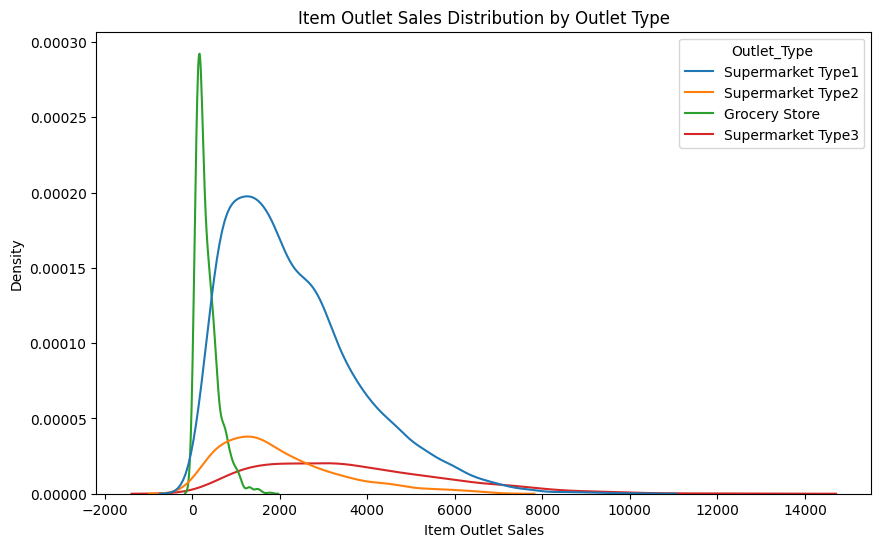

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot KDE curves of Item_Outlet_Sales by Outlet_Type in the same plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='Item_Outlet_Sales', hue='Outlet_Type', fill=False)

plt.title('Item Outlet Sales Distribution by Outlet Type')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Density')
plt.show()